Start with trying to do some of the known periodic solutions: https://en.wikipedia.org/wiki/Three-body_problem#/media/File:5_4_800_36_downscaled.gif. animation comes from this reddit thread https://www.reddit.com/r/physicsgifs/comments/14db21p/a_few_three_body_periodic_orbits/, where the creator links to this website with initial conditions to use for a lot of known orbits: https://observablehq.com/@rreusser/periodic-planar-three-body-orbits. Use code units with G=1 and m=1.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join('..', 'importantfunctions'))
from ODEsolvers import *

In [30]:
#this is the diffeq that does the affect of body b on a
def Fab(ra,rb,t,mb,G=1): #where ra is the vector (x,y,vx,vy) for body a and rb is for body b
    dx=rb[0]-ra[0]
    dy=rb[1]-ra[1]
    
    vx=ra[2]
    vy=ra[3]
    
    R=(dx**2+dy**2)**0.5

    ax=G*mb*dx/(R**3)
    ay=G*mb*dy/(R**3)
    
    return np.array([vx,vy,ax,ay],float)

In [28]:
def diffeq(state,t,m1=1,m2=1,m3=1):
    r1=state[0:4]
    r2=state[4:8]
    r3=state[8:12]

    dr1=Fab(r1,r2,t,m2)+Fab(r1,r3,t,m3) #just adding up the effects of the different stars on each other
    dr2=Fab(r2,r1,t,m1)+Fab(r2,r3,t,m3)
    dr3=Fab(r3,r1,t,m1)+Fab(r3,r2,t,m2)

    return np.concatenate([dr1,dr2,dr3])

First one: Lagrange equilateral triangle. Got ICs from ChatGPT. Equal masses, starting points along an equilateral triangle, and velocities perpendicular to the radius from the center of mass with the magnitude v=sqrt(Gm/(rtriangle*sqrt(3)))

In [74]:
R01=np.array([1,0,0,0.57735])
R02=np.array([-0.5,np.sqrt(3)/2,-0.5*np.sqrt(1/3),-np.sqrt(3)/2*np.sqrt(1/3)])
R03=np.array([-0.5,-np.sqrt(3)/2,0.5*np.sqrt(1/3),-np.sqrt(3)/2*np.sqrt(1/3)])
R0=np.concatenate([R01,R02,R03])
h=0.00001

In [76]:
Ts,Rs=RK4(diffeq,R0,h=h,N=1000000)

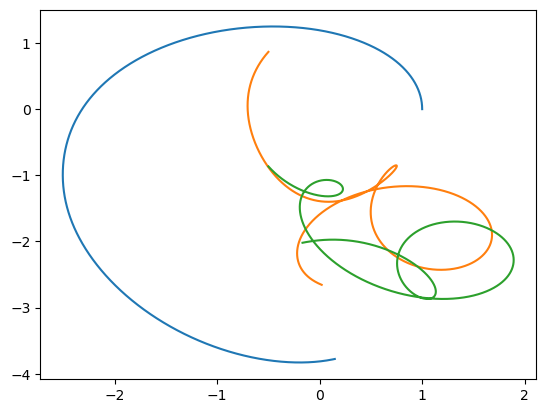

In [77]:
plt.plot(Rs[:,0],Rs[:,1])
plt.plot(Rs[:,4],Rs[:,5])
plt.plot(Rs[:,8],Rs[:,9])

You can see that they start on the nice orbiting along the path of the same circle trajectory, but the errors quickly destablize the system and they spiral out of control. Now do the one labeled I.A.1 i.c. in the Li & Lao equal mass category on the website linked above. Should be a figure 8.

In [83]:
R01=np.array([-1,0,0.3471168881,0.5327249454])
R02=np.array([1,0,0.3471168881,0.5327249454])
R03=np.array([0,0,-0.6942337762,-1.0654498908])
R0=np.concatenate([R01,R02,R03])

In [99]:
Ts,Rs=RK4(diffeq,R0,h=0.00001,maxt=7) #period is 6.3259139829

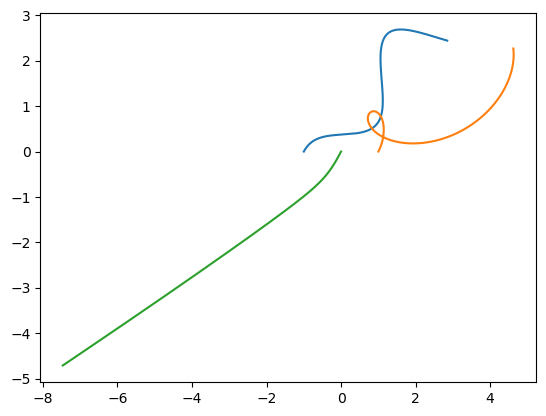

In [100]:
plt.plot(Rs[:,0],Rs[:,1])
plt.plot(Rs[:,4],Rs[:,5])
plt.plot(Rs[:,8],Rs[:,9])

Destablizes super fast. Now try the first Free fall one on the same website. Free fall as in no initial velocity, so that might prevent the errors from building up too fast.

In [104]:
R01=np.array([-0.5,0,0,0])
R02=np.array([0.5,0,0,0])
R03=np.array([0.0207067154,0.3133550361,0,0])
R0=np.concatenate([R01,R02,R03])

In [110]:
Ts,Rs=RK4(diffeq,R0,h=0.00001,maxt=3) #period is 2.1740969264

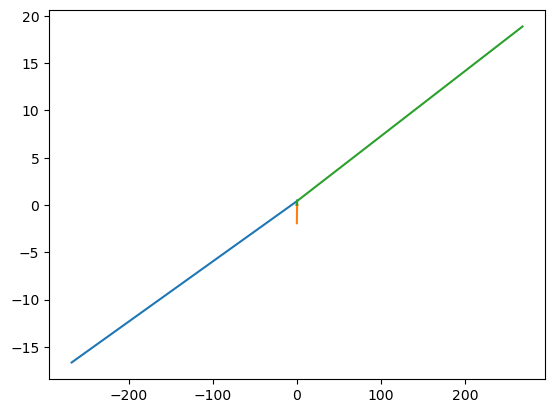

In [111]:
plt.plot(Rs[:,0],Rs[:,1])
plt.plot(Rs[:,4],Rs[:,5])
plt.plot(Rs[:,8],Rs[:,9])

Lol nope they run past each other so fast.

Try to make a nice animation and then will work on adaptive time stepping.

In [138]:
#this is the butterfly I sequence orbit 1.2.A
R01=np.array([-1,0,0.306893,0.125507])
R02=np.array([1,0,0.306893,0.125507])
R03=np.array([0,0.3133550361,-0.613786,-0.251014])
R0=np.concatenate([R01,R02,R03])

In [140]:
Ts,Rs=RK4(diffeq,R0,h=0.00001,maxt=7) #period is 6.234671

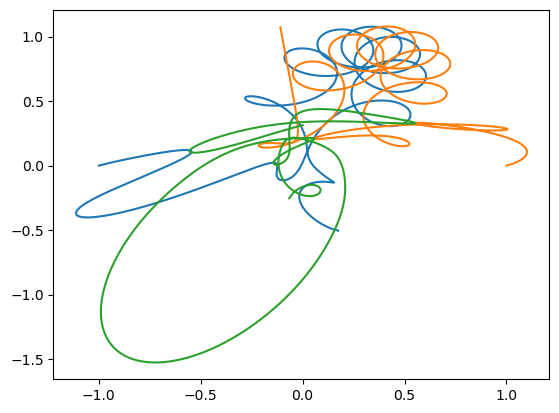

In [141]:
plt.plot(Rs[:,0],Rs[:,1])
plt.plot(Rs[:,4],Rs[:,5])
plt.plot(Rs[:,8],Rs[:,9])